# Analyse des commentaires
Dans ce notebook, nous allons regarder en détail les commentaires laissés par les utilisateurs.
Le travail sera divisé en deux parties : Construction du corpus et Début ? d'analyse des fréquences

In [ ]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
import reco_systems.text_filtering as ft
from reco_systems.user_game_matrix import center_score
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arlyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Partie 1 : Construction corpus

Afin de construire le corpus, nous allons utiliser la fonction ```corpus_construction``` du fichier _text_filtering.py_ Celle-ci prend en paramètre la taille du corpus souhaité et utilise la BDD _lemmas.csv_ afin de récupérer les fréquences d'apparition de chaque lemma. Pour l'instant, nous gardons les $k$ instances les plus fréquentes, où $k$ représente la taille passée en paramètre.

(proposition de modification: ajouter en paramètre le nombre d'apparition minimum de chaque instance sur l'ensemble des avis ?)

In [ ]:
corpus2 = ft.construction_corpus(2000)
corpus5 = ft.construction_corpus(5000)
corpus10 = ft.construction_corpus(10000)

## Partie 2 : Analyse des fréquences

Maintenant que nous avons créé nos corpus, nous pouvons comparer les champs lexicaux utilisés sur les avis négatifs et positifs. Pour cela, nous devons d'abord séparer les avis en deux catégories. Il est important de centrer les notes afin d'enlever le biais des utilisateurs sur les notes.

In [62]:
# Construction de la BDD avec avis centrés
avis = pd.read_csv("database_cleaned/avis_clean.csv", index_col = 0)
min_reviews = 10
rev_filter = filter_df(avis, min_reviews)
filtered_centrd_data, _= center_score(rev_filter)

11201 10549
2252 2676
1957 2618
1947 2616
1946 2615
1945 2614


In [64]:
# Séparation de la bdd 
positifs = filtered_centrd_data[filtered_centrd_data['Rating'] >=0][['Comment title', 'Comment body']].copy()
negatifs = filtered_centrd_data[filtered_centrd_data['Rating'] <0][['Comment title', 'Comment body']].copy()

In [54]:
# lem = pd.read_csv("generated_data/lemmas.csv")[['Comment line', 'Lemma']]
# lem['Lemma'] = lem['Lemma'].apply(lambda val : " " if type(val) != str else val )
# lem = lem.groupby(by='Comment line').apply(lambda row : " ".join(row["Lemma"])) 
# lem = lem.to_frame()
# lem.columns = ['Comment']
# lem.to_csv("generated_data/avis_lemmatized.csv")

À partir de là, nous pouvons appliquer la fonction ```word_freq``` qui calcul la fréquence de chaque lemma dans chaque dataframe des avis.

In [65]:
fpos = ft.words_freq(positifs, corpus2)
fneg = ft.words_freq(negatifs, corpus2)

Text(0.5, 1.0, "Fréquence des Lemmas par type d'avis : corpus 2000")

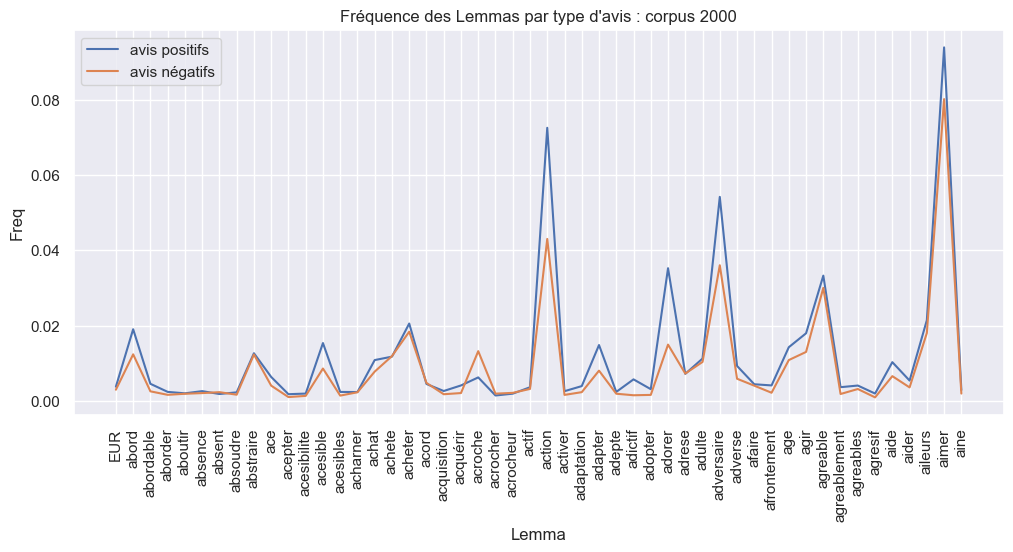

In [86]:
sns.set_theme(rc={'figure.figsize' : (12, 5)})
ax = sns.lineplot(fpos.head(50),x='Lemma',y='Freq',label='avis positifs')
ax = sns.lineplot(fneg.head(50),x='Lemma',y='Freq',label='avis négatifs')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Fréquence des Lemmas par type d'avis : corpus 2000")

On peut remarquer qu'à certains endroit, il existe des écarts de fréquence beaucoup plus prononcés qu'à d'autres. Afin de mieux les voir, nous pouvons utiliser la fonction ```diff_freq```. Elle retourne un dataframe avec, pour chaque lemma $l$, la différence entre la fréquence de $l$ dans les avis positifs et celle dans les avis négatifs. Ainsi, la différence de fréquence sera positive si $l$ apparaît plus souvent dans les avis positifs et que négatifs, et vice versa.

Le DataFrame retourné est trié par différence de fréquence décroissante.

In [68]:
fdiff = ft.diff_freq(fpos,fneg)
fdiff

,Lemma,Freq differency
30673,jeu,0.205292
57127,tres,0.129466
31092,joueur,0.069317
22318,faire,0.052982
21543,excelent,0.050154
...,...,...
48505,repetitif,-0.013907
34669,manque,-0.014326
17428,domage,-0.014892
29848,interet,-0.018720


Text(0.5, 1.0, 'Différence de fréquences : 50 mots + notables avis positifs : corpus 2000')

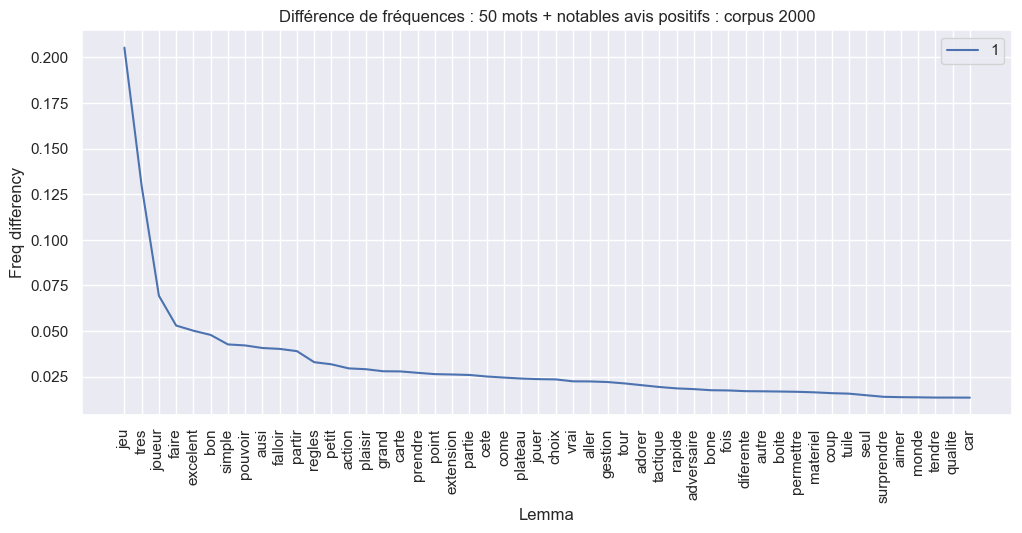

In [85]:
sns.set_theme(rc={'figure.figsize' : (12, 5)})
ax = sns.lineplot(fdiff.head(50), x='Lemma',y='Freq differency', label='1')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Différence de fréquences : 50 mots + notables avis positifs : corpus 2000")

Text(0.5, 1.0, 'Différence de fréquence : 50 mots + notables avis négatifs : corpus 2000')

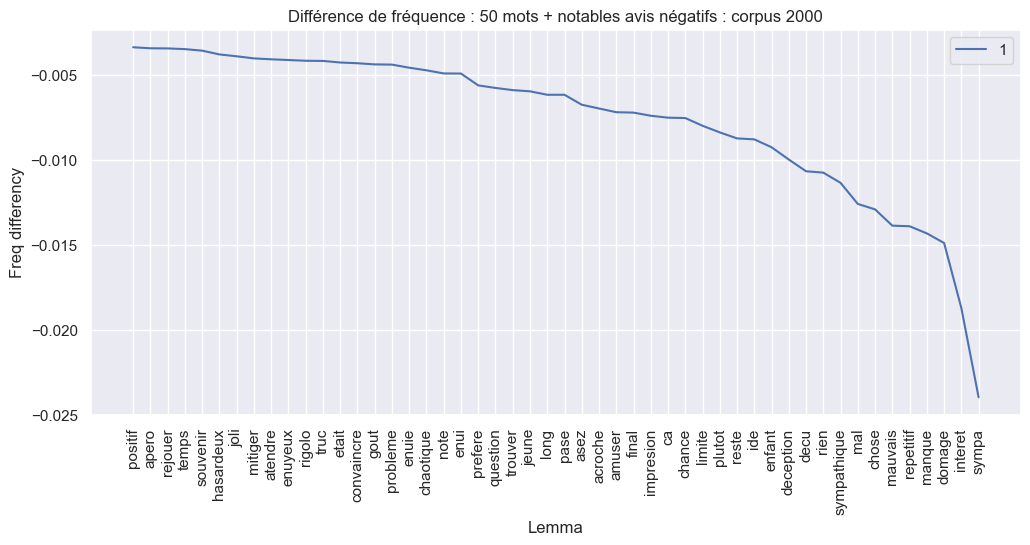

In [84]:
sns.set_theme(rc={'figure.figsize' : (12, 5)})
ax = sns.lineplot(fdiff.tail(50), x='Lemma',y='Freq differency', label='1')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Différence de fréquence : 50 mots + notables avis négatifs : corpus 2000")

Zoom sur les différences de fréquence


Text(0.5, 1.0, 'Différence de fréquence sur les pires mots : corpus 2000')

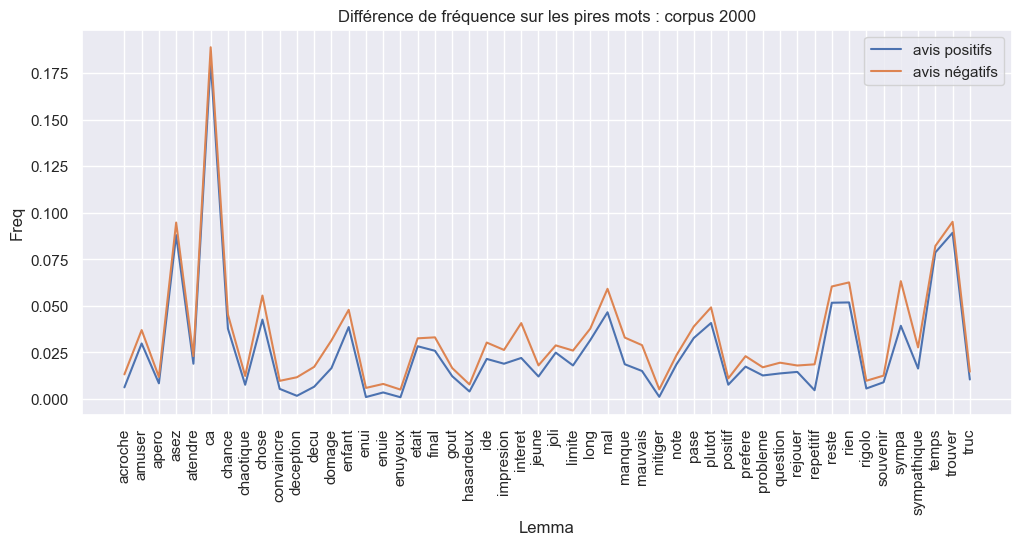

In [82]:
lemmas_neg = fdiff.tail(50)['Lemma'].to_numpy()
pos_tail = fpos[fpos['Lemma'].isin(lemmas_neg)]
neg_tail = fneg[fneg['Lemma'].isin(lemmas_neg)]

ax = sns.lineplot(pos_tail, x='Lemma', y='Freq', label='avis positifs')
ax = sns.lineplot(neg_tail, x='Lemma', y='Freq', label='avis négatifs')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Différence de fréquence sur les pires mots : corpus 2000")

Text(0.5, 1.0, 'Différence de fréquence sur les meilleurs mots : corpus 2000')

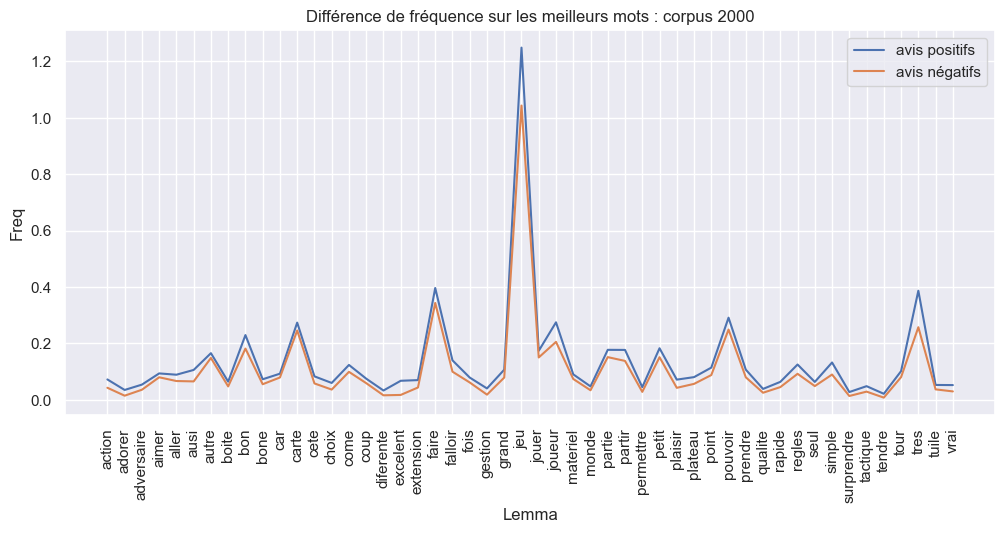

In [83]:
lemmas_neg = fdiff.head(50)['Lemma'].to_numpy()
pos_head = fpos[fpos['Lemma'].isin(lemmas_neg)]
neg_head = fneg[fneg['Lemma'].isin(lemmas_neg)]

ax = sns.lineplot(pos_head, x='Lemma', y='Freq', label='avis positifs')
ax = sns.lineplot(neg_head, x='Lemma', y='Freq', label='avis négatifs')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Différence de fréquence sur les meilleurs mots : corpus 2000")